# **로지스틱 회귀 모델 구축**



## **모듈 불러오기**

In [42]:

#실습용 데이터
from sklearn.datasets import load_breast_cancer

#데이터 전처리
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#머신러닝 모델 구축 / 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score

#데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트
plt.style.use('seaborn')
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', unicode_minus=False)

## **데이터 불러오기**

In [43]:
#설명
breast_cancer=load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [44]:
#변수 확인
print(breast_cancer.feature_names)
print(breast_cancer.target_names)

# 0 : malignant (유방암 있음), 1 : benign (유방암 없음)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [45]:
#유방암일 확률(1), 유방암이 아닐 확률 (0)으로 label변경
breast_cancer.target=np.where(breast_cancer.target==0,1,0)

## **데이터 전처리**

In [46]:
#train / test set 분리
X_train,X_test,y_train,y_test=train_test_split(breast_cancer.data,breast_cancer.target,test_size=0.3,random_state=2021)

In [47]:
#칼럼 단위 정규화
normalizer=StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.transform(X_test)

## **로지스틱 회귀 모델 구축**

### **모델 불러오기**

In [48]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **$\beta$ 값 확인하기**

In [49]:
#칼럼에 따른 beta, exp(beta) 확인
column_name=["const"]+breast_cancer.feature_names.tolist()
beta=np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2)
odds=np.exp(beta).round(2)
interpret=np.where(beta>0,"risky","protective")

#beta 해석
beta_analysis=pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=["beta","exp(beta)","interprt"])
beta_analysis

beta exp(beta)    interprt
const                    -0.42      0.66  protective
mean radius               0.54      1.72       risky
mean texture              0.92      2.51       risky
mean perimeter            0.55      1.73       risky
mean area                 0.56      1.75       risky
mean smoothness           0.13      1.14       risky
mean compactness         -0.48      0.62  protective
mean concavity            0.93      2.53       risky
mean concave points       0.72      2.05       risky
mean symmetry             0.23      1.26       risky
mean fractal dimension   -0.64      0.53  protective
radius error              1.09      2.97       risky
texture error            -0.56      0.57  protective
perimeter error           0.81      2.25       risky
area error                0.87      2.39       risky
smoothness error          0.29      1.34       risky
compactness error        -0.46      0.63  protective
concavity error          -0.14      0.87  protective
concave points error      0.27      1.31       risky
symmetry error           -0.42      0.66  protective
fractal dimension error  -0.41      0.66  protective
worst radius              0.78      2.18       risky
worst texture             1.16      3.19       risky
worst perimeter           0.75      2.12       risky
worst area                0.77      2.16       risky
worst smoothness          1.01      2.75       risky
worst compactness        -0.08      0.92  protective
worst concavity           0.68      1.97       risky
worst concave points      0.99      2.69       risky
worst symmetry             1.1       3.0       risky
worst fractal dimension   0.17      1.19       risky

### **test data 예측**

In [50]:
model.predict_proba(X_test)

array([[9.99587046e-01, 4.12953680e-04],
       [9.99985165e-01, 1.48350838e-05],
       [9.92817867e-01, 7.18213277e-03],
       [2.53352894e-13, 1.00000000e+00],
       [9.99986549e-01, 1.34505123e-05],
       [9.81298434e-02, 9.01870157e-01],
       [9.80024204e-07, 9.99999020e-01],
       [9.99932732e-01, 6.72677815e-05],
       [8.15117335e-05, 9.99918488e-01],
       [9.99995214e-01, 4.78559272e-06],
       [9.99999649e-01, 3.51231679e-07],
       [6.98821879e-06, 9.99993012e-01],
       [9.89324333e-01, 1.06756670e-02],
       [5.05948740e-04, 9.99494051e-01],
       [9.99274489e-01, 7.25511212e-04],
       [9.99218536e-01, 7.81464092e-04],
       [9.37761744e-01, 6.22382562e-02],
       [9.99971984e-01, 2.80156564e-05],
       [9.99964918e-01, 3.50820533e-05],
       [1.03711710e-03, 9.98962883e-01],
       [9.24921333e-01, 7.50786674e-02],
       [9.78028441e-01, 2.19715590e-02],
       [2.99663721e-04, 9.99700336e-01],
       [9.94848393e-01, 5.15160717e-03],
       [9.998572

In [51]:
#패키지 이용하지 않고 직접 계산하는 경우

#beta 곱하기 X
Xbeta=np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))

#P(Y=1) 계산
P_1=1/(1+np.exp(-Xbeta))
P_1

array([[4.08614196e-04],
       [1.42624030e-05],
       [7.25139527e-03],
       [1.00000000e+00],
       [1.32898448e-05],
       [9.02381926e-01],
       [9.99999007e-01],
       [6.67644924e-05],
       [9.99917102e-01],
       [4.82436340e-06],
       [3.53619794e-07],
       [9.99993088e-01],
       [1.05944860e-02],
       [9.99490855e-01],
       [7.25129180e-04],
       [7.81765785e-04],
       [6.21258983e-02],
       [2.78856383e-05],
       [3.46988034e-05],
       [9.98973906e-01],
       [7.35081584e-02],
       [2.20214909e-02],
       [9.99720954e-01],
       [5.09278431e-03],
       [1.39938834e-04],
       [6.38890985e-04],
       [4.45449731e-04],
       [7.76146716e-10],
       [9.10469843e-01],
       [3.28604625e-02],
       [7.55151360e-05],
       [5.11000480e-05],
       [8.13808103e-03],
       [1.17633761e-05],
       [9.99999991e-01],
       [9.99999157e-01],
       [2.47149697e-04],
       [9.99999383e-01],
       [9.99454660e-01],
       [4.58982621e-05],


## **성능 평가하기**

### **cutoff 조절**

In [52]:
Cut_off=np.linspace(0.01,0.99,10) #cut off 값 만들기
for cutoff in Cut_off:
  y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
  #cutoff 보다 크면 1 (유방암), 아니면 0 (유방암 X)
  acc=accuracy_score(y_true=y_test,y_pred=y_pred) #정확도
  recall=recall_score(y_true=y_test,y_pred=y_pred) #민감도
  precision=precision_score(y_true=y_test,y_pred=y_pred) #정밀도

  print(f"정확도 : {acc : 0.2f}",f"민감도 : {recall : 0.2f}",f"정밀도 : {precision : 0.2f}",f"cut off : {cutoff : 0.2f}")

정확도 :  0.83 민감도 :  0.98 정밀도 :  0.69 cut off :  0.01
정확도 :  0.94 민감도 :  0.97 정밀도 :  0.87 cut off :  0.12
정확도 :  0.95 민감도 :  0.97 정밀도 :  0.91 cut off :  0.23
정확도 :  0.96 민감도 :  0.95 정밀도 :  0.94 cut off :  0.34
정확도 :  0.96 민감도 :  0.94 정밀도 :  0.95 cut off :  0.45
정확도 :  0.97 민감도 :  0.94 정밀도 :  0.98 cut off :  0.55
정확도 :  0.96 민감도 :  0.92 정밀도 :  0.98 cut off :  0.66
정확도 :  0.96 민감도 :  0.91 정밀도 :  1.00 cut off :  0.77
정확도 :  0.95 민감도 :  0.88 정밀도 :  1.00 cut off :  0.88
정확도 :  0.92 민감도 :  0.78 정밀도 :  1.00 cut off :  0.99


### **ROC curve 그리기**

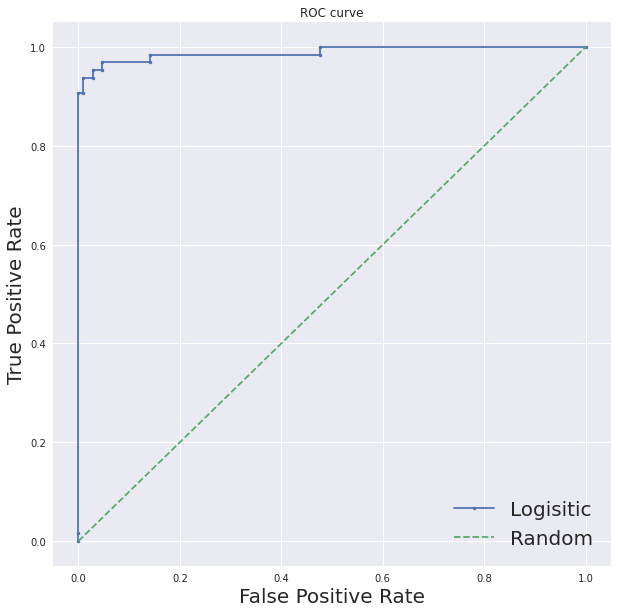

In [53]:
#X_test에 대해 y=1(유방암)일 확률
probs=model.predict_proba(X_test)[:,1]

#ROC curve x축, y축
model_fpr, model_tpr, threshold1=roc_curve(y_test,probs)

#random은 유방암 유무를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(X_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()